In [1]:
import jax.random as jr
import jax
import matplotlib.pyplot as plt

from  src.sdes import sde_time_dependent, sde_utils, time

In [2]:
t_start = 0.
T = 1.
x0 = (3.,)
y = (0.,)
N = 100
num_trajectories = 20

key =  jr.PRNGKey(1)
traj_keys = jax.random.split(key, num_trajectories)

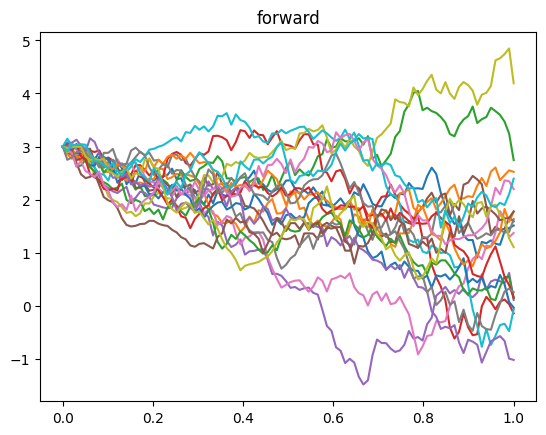

In [4]:
time_grid = time.grid(t_start=t_start, T=T ,N=N)

drift, diffusion = sde_time_dependent.vector_fields()
trajectories = jax.vmap(sde_utils.solution, (0, None, None, None, None))(traj_keys, time_grid, x0, drift, diffusion)

for traj in trajectories:
    plt.plot(time_grid, traj)
plt.title("forward")
plt.show()

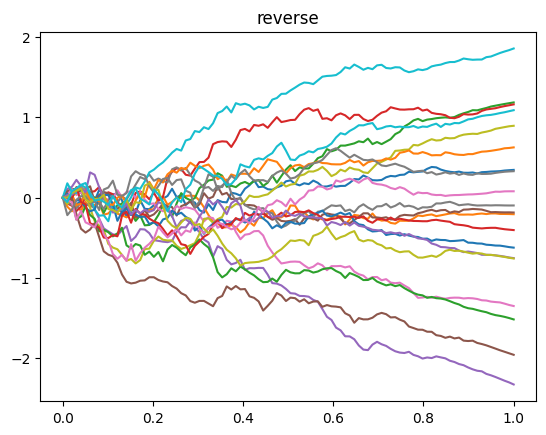

In [5]:
rev_keys = jax.random.split(key, num_trajectories)
drift_rev, diffusion_rev = sde_time_dependent.vector_fields_reverse()
rev = jax.vmap(sde_utils.solution, (0, None, None, None, None))(traj_keys, time_grid, y, drift_rev, diffusion_rev)

for traj in rev:
    plt.plot(time_grid, traj)
plt.title("reverse")
plt.show()

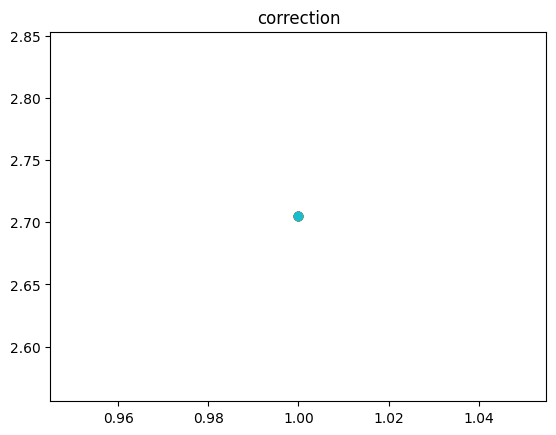

In [6]:
data_fn = sde_time_dependent.data_reverse(y, T, N)
ts, rev, corr = data_fn(rev_keys)

for correct in corr:
    plt.scatter(ts[0, -1], correct)
plt.title("correction")
plt.show()